In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plot
import seaborn

In [16]:
outputPath = 'D:/Localization_SimulatedData-master/Localization_v_2_0/gitUpload_160_side'
trainSetCoordsPath = 'D:/Localization_SimulatedData-master/Localization_v_2_0/gitUpload_160_side/coordinates_train.txt'
testSetCoordsPath = 'D:/Localization_SimulatedData-master/Localization_v_2_0/gitUpload_160_side/coordinates_test.txt'
m_id = '160'
train_test_data = True
trainSetCSV = 'D:/Localization_SimulatedData-master/Localization_v_2_0/gitUpload_160_side/result_train.csv'


In [17]:
detectionResultsTrainSet = pd.read_csv (trainSetCSV)

In [18]:
detectionResultsTrainSet[['160_bb_x1']].values

array([[2000.68],
       [2000.23],
       [2000.22],
       ...,
       [2018.32],
       [2018.29],
       [2018.27]])

In [19]:
markerSquaresTrainSet = detectionResultsTrainSet [
    [ m_id + '_bb_x1' , m_id + '_bb_y1' , m_id + '_bb_x2' , m_id + '_bb_y2' , m_id + '_bb_x3' , m_id + '_bb_y3' , m_id +
      '_bb_x4' , m_id + '_bb_y4' ] ].values

In [21]:
markerSquaresTrainSet[0]

array([2000.68 ,  833.759, 1857.24 ,  772.152, 1957.05 ,  621.17 ,
       2113.78 ,  716.685])

In [41]:
detectionResultsTrainSet

,image,160_x,160_y,160_z,160_r1,160_r2,160_r3,160_bb_x1,160_bb_y1,160_bb_x2,160_bb_y2,160_bb_x3,160_bb_y3,160_bb_x4,160_bb_y4,160_error
0,/hri/localdisk/ThesisProject/Kaushik/Kaushik/T...,2.53679,-3.36046,1.41405,-0.026265,3.11050,-0.001775,2000.68,833.759,1857.24,772.152,1957.05,621.170,2113.78,716.685,0.257770
1,/hri/localdisk/ThesisProject/Kaushik/Kaushik/T...,2.53283,-3.35595,1.41439,-0.018385,3.10459,-0.008816,2000.23,834.125,1856.88,772.505,1956.77,621.327,2113.44,716.916,0.260331
2,/hri/localdisk/ThesisProject/Kaushik/Kaushik/T...,2.53356,-3.35701,1.41520,-0.018895,3.10455,-0.010494,2000.22,834.274,1856.81,772.568,1956.72,621.481,2113.38,716.789,0.224089
3,/hri/localdisk/ThesisProject/Kaushik/Kaushik/T...,2.53320,-3.35633,1.41470,-0.020581,3.10538,-0.007394,2000.25,834.167,1856.93,772.565,1956.81,621.338,2113.34,716.939,0.237510
4,/hri/localdisk/ThesisProject/Kaushik/Kaushik/T...,2.52234,-3.34299,1.40930,-0.019079,3.10516,0.006562,2000.21,834.215,1856.99,772.486,1956.80,621.396,2113.32,716.794,0.321200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,/hri/localdisk/ThesisProject/Kaushik/Kaushik/T...,2.62332,-3.30745,1.38525,-0.059236,3.10614,0.002648,2018.24,842.911,1876.21,776.914,1980.13,628.496,2134.49,729.104,0.297237
1278,/hri/localdisk/ThesisProject/Kaushik/Kaushik/T...,2.63020,-3.31648,1.38879,-0.065448,3.10901,0.012728,2018.25,842.869,1876.15,776.954,1980.15,628.513,2134.56,729.116,0.308714
1279,/hri/localdisk/ThesisProject/Kaushik/Kaushik/T...,2.62882,-3.31504,1.38842,-0.065165,3.10663,0.004223,2018.32,842.831,1876.21,776.894,1980.14,628.515,2134.42,728.984,0.231988
1280,/hri/localdisk/ThesisProject/Kaushik/Kaushik/T...,2.62840,-3.31437,1.38833,-0.065938,3.10539,0.003442,2018.29,842.895,1876.30,776.784,1980.21,628.428,2134.41,729.105,0.275285


In [64]:
data = detectionResultsTrainSet[[m_id + '_bb_x1' , m_id + '_bb_y1' , m_id + '_bb_x2' , m_id + '_bb_y2' , m_id + '_bb_x3' , m_id + '_bb_y3' , m_id +
      '_bb_x4' , m_id + '_bb_y4']].values

In [65]:
dataset = pd.DataFrame({'x1': data[:, 0],'y1': data[:, 1],'x2': data[:, 2],'y2': data[:, 3],'x3': data[:, 4],'y3': data[:, 5],'x4': data[:, 6],'y4': data[:, 7]})

In [66]:
dataset
dataset['C'] = np.arange(len(dataset))

In [52]:
dataset_mod = dataset[(dataset['xa']>0)]

In [67]:
dataset['total_sum'] = dataset[["x1", "y1", "x2","y2","x3", "y3", "x4","y4"]].sum(axis=1)

In [74]:
dataset['cum_sum'] = dataset['bool'].cumsum()

In [70]:
dataset.loc[dataset['total_sum']>0,'bool']=1

In [75]:
dataset

,x1,y1,x2,y2,x3,y3,x4,y4,C,total_sum,bool,cum_sum
0,2000.68,833.759,1857.24,772.152,1957.05,621.170,2113.78,716.685,0,10872.516,1.0,1.0
1,2000.23,834.125,1856.88,772.505,1956.77,621.327,2113.44,716.916,1,10872.193,1.0,2.0
2,2000.22,834.274,1856.81,772.568,1956.72,621.481,2113.38,716.789,2,10872.242,1.0,3.0
3,2000.25,834.167,1856.93,772.565,1956.81,621.338,2113.34,716.939,3,10872.339,1.0,4.0
4,2000.21,834.215,1856.99,772.486,1956.80,621.396,2113.32,716.794,4,10872.211,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1277,2018.24,842.911,1876.21,776.914,1980.13,628.496,2134.49,729.104,1277,10986.495,1.0,1086.0
1278,2018.25,842.869,1876.15,776.954,1980.15,628.513,2134.56,729.116,1278,10986.562,1.0,1087.0
1279,2018.32,842.831,1876.21,776.894,1980.14,628.515,2134.42,728.984,1279,10986.314,1.0,1088.0
1280,2018.29,842.895,1876.30,776.784,1980.21,628.428,2134.41,729.105,1280,10986.422,1.0,1089.0


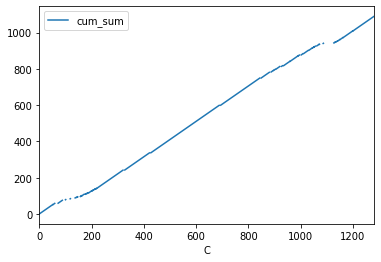

In [76]:
dataset.plot( x='C', y='cum_sum')

In [24]:
mu = 80
sigma = 7
x = np.random.normal(mu, sigma, size=200)

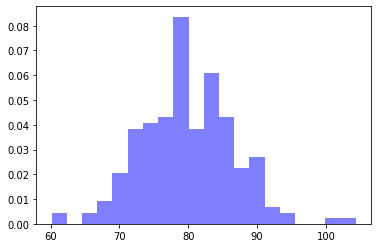

In [25]:
plt.hist(x, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

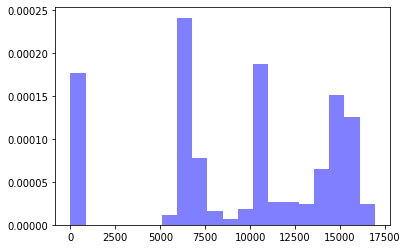

In [69]:
plt.hist(dataset['total_sum'], 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [28]:
x

array([ 89.8883374 ,  86.94273243,  70.43457341,  84.03728727,
        89.69803648,  79.35603738,  83.27100918,  85.28332391,
        86.72640966,  68.98719628, 101.04890484,  82.82204942,
        83.6705156 ,  88.89885944,  87.068079  ,  72.46303789,
        76.48848726,  78.3675594 ,  77.69916671,  73.15402227,
        94.57635524,  76.61736335,  80.1835045 ,  76.11481222,
        76.1735862 ,  75.53711482,  82.34061746,  79.51520531,
        77.2131155 ,  66.77252199,  82.12208332,  76.27577438,
        71.50424802,  85.06515159,  81.59373448,  78.25468478,
        90.46404894,  78.72226298,  84.39572372,  81.19460841,
        72.06686285,  88.07729606,  79.08889049,  79.06602254,
        85.1920639 ,  81.02252466,  91.42353931,  83.69341189,
        79.98499695,  78.95443668,  80.78033184,  84.74018534,
        72.57370833,  71.759587  ,  78.16945819,  70.36003156,
        74.36443424,  71.79745993,  68.5191458 ,  71.87663506,
        89.26959011,  78.68893851,  68.98077992,  85.28